In [1]:
import pandas as pd
import numpy as np
import csv
import os
from datetime import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#Activate the first option if whole column width is necessary and the second to make all columns visible
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', 999)

## I. Import the processed dataset

In [3]:
#Get the report and store it into a dataframe. Check what columns are included in the file
report = pd.read_csv('Traffic_Master_Proccessed_v1.csv', dtype = str, index_col = 0)
print(report.columns)
print(report.shape)

Index(['LinkID', 'RNum', 'Start', 'End', 'Linklength', 'Time(s)',
       'Stnddeviation', 'Vehiclecount', 'Avgspeed(mph)', 'DIR', 'FEATURE_ID',
       'feature_id', 'town', 'hierarchy', 'roadclass', 'road_type_hw',
       'urban_rural'],
      dtype='object')
(803747, 17)


In [4]:
report.head(5)

,LinkID,RNum,Start,End,Linklength,Time(s),Stnddeviation,Vehiclecount,Avgspeed(mph),DIR,FEATURE_ID,feature_id,town,hierarchy,roadclass,road_type_hw,urban_rural
32,4000000019185514B,A41,NaN,NaN,1305.82,41.41,5.37,400,70.53,B,A41/053,A41/053,Berkhamsted,PR Primary Distributor,Principal Road - A,Dual 2 Lane,Rural
33,4000000019185515A,A41,NaN,NaN,1303.45,39.75,4.36,1559,73.36,A,A41/052,A41/052,Berkhamsted,PR Primary Distributor,Principal Road - A,Dual 2 Lane,Rural
34,4000000019185518B,A41,NaN,NaN,996.58,33.23,4.52,405,67.08,B,A41/015,A41/015,Tring,PR Primary Distributor,Principal Road - A,Dual 2 Lane,Rural
35,4000000019185519A,A41,NaN,NaN,880.21,26.92,3.53,1477,73.15,A,A41/014,A41/014,Tring,PR Primary Distributor,Principal Road - A,Dual 2 Lane,Rural
36,4000000019185520A,A4251,NaN,NaN,1328.44,53.27,6.64,187,55.79,A,A4251/50,A4251/50,Dudswell,MN Main Distributor,Principal Road - A,Single 2-Lane Carriageway,Rural


### Vehicle Speed: By hierarchy

In [5]:
report['Avgspeed(mph)'] = report['Avgspeed(mph)'].astype(float)
report['Avgspeed(mph)'].describe()

count    803747.000000
mean         18.253340
std           9.890016
min           0.000000
25%          12.330000
50%          17.720000
75%          23.900000
max          74.980000
Name: Avgspeed(mph), dtype: float64

In [8]:
#Average speed per road hierarchy:
report.groupby(['hierarchy']).agg({'Avgspeed(mph)': ['mean']})

,Avgspeed(mph)
,mean
hierarchy,
L1 Local Distributor,21.806628
L2 Local Access,15.014115
L3 Surfaced PRoW,14.095415
MN Main Distributor,23.136324
PR Primary Distributor,33.346606
SD Secondary Distributor,24.590568


In [11]:
l1 = report.loc[report['hierarchy']=='L1 Local Distributor']
l2 = report.loc[report['hierarchy']=='L2 Local Access']
l3 = report.loc[report['hierarchy']=='L3 Surfaced PRoW']
MN = report.loc[report['hierarchy']=='MN Main Distributor']
PR = report.loc[report['hierarchy']=='PR Primary Distributor']
SD = report.loc[report['hierarchy']=='SD Secondary Distributor']

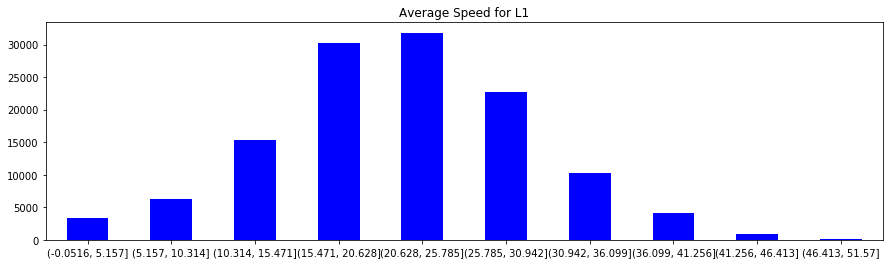

In [14]:
out = pd.cut(l1['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,4))
ax.set_title('Average Speed for L1')
plt.show()

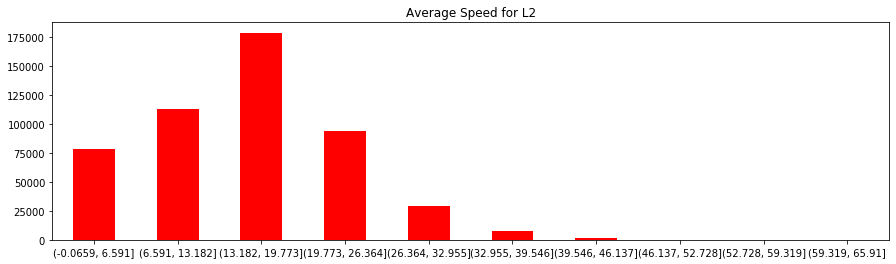

In [16]:
out = pd.cut(l2['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="r", figsize=(15,4))
ax.set_title('Average Speed for L2')
plt.show()

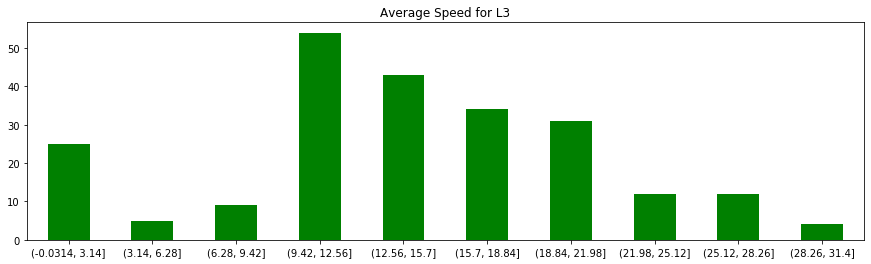

In [17]:
out = pd.cut(l3['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="g", figsize=(15,4))
ax.set_title('Average Speed for L3')
plt.show()

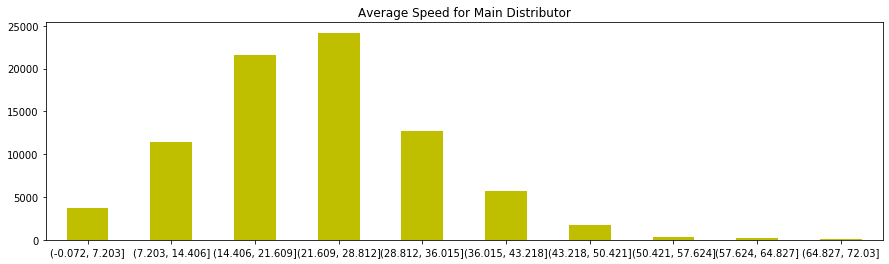

In [19]:
out = pd.cut(MN['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="y", figsize=(15,4))
ax.set_title('Average Speed for Main Distributor')
plt.show()

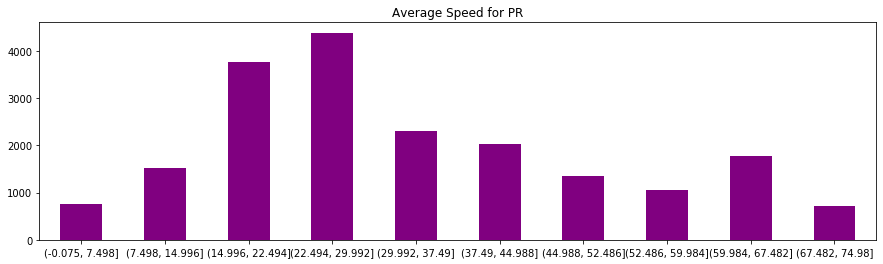

In [23]:
out = pd.cut(PR['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="purple", figsize=(15,4))
ax.set_title('Average Speed for PR')
plt.show()

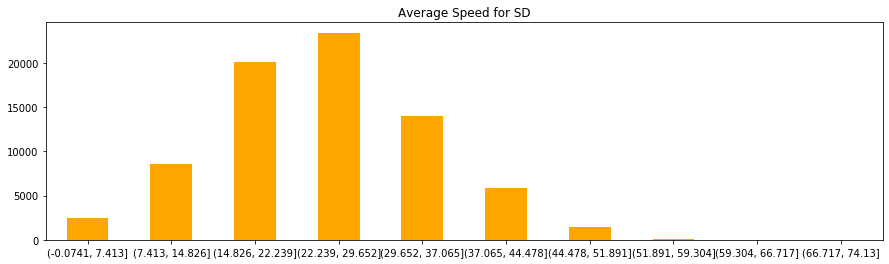

In [25]:
out = pd.cut(SD['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="orange", figsize=(15,4))
ax.set_title('Average Speed for SD')
plt.show()

### Vehicle Speed: by road type

In [26]:
#Average speed per road hierarchy:
report.groupby(['road_type_hw']).agg({'Avgspeed(mph)': ['mean']})

,Avgspeed(mph)
,mean
road_type_hw,
Carriageway Oneway 1-Lane,15.479476
Carriageway Oneway 2-Lane,15.125039
Carriageway Oneway 3-Lane,16.997374
Carriageway Oxbow-Layby,10.214856
Dual 1 Lane,23.289029
Dual 2 Lane,33.253590
Dual 3 Lane,24.658838
Roundabout,20.242919


In [28]:
CR1 = report.loc[report['road_type_hw']=='Carriageway Oneway 1-Lane']
CR2 = report.loc[report['road_type_hw']=='Carriageway Oneway 2-Lane']
CR3 = report.loc[report['road_type_hw']=='Carriageway Oneway 3-Lane']
CROX = report.loc[report['road_type_hw']=='Carriageway Oxbow-Layby']
DL1 = report.loc[report['road_type_hw']=='Dual 1 Lane']
DL2 = report.loc[report['road_type_hw']=='Dual 2 Lane']
DL3 = report.loc[report['road_type_hw']=='Dual 3 Lane']
SL2 = report.loc[report['road_type_hw']=='Single 2-Lane Carriageway']
SL3 = report.loc[report['road_type_hw']=='Single 3-Lane Carriageway']
SL1 = report.loc[report['road_type_hw']=='Single Lane Carriageway']

In [40]:
report['road_type_hw'].value_counts()

Single 2-Lane Carriageway         729217
Roundabout                         31667
Dual 2 Lane                        17453
Carriageway Oneway 2-Lane           9402
Single Lane Carriageway             7893
Carriageway Oneway 1-Lane           3700
Slip/Feeder Road Oneway 2-Lane       743
Slip/Feeder Road Oneway 1-Lane       649
Carriageway Oneway 3-Lane            575
Dual 3 Lane                          396
Carriageway Oxbow-Layby              313
Slip/Feeder Road Single 2-Lane       308
Dual 1 Lane                          278
Single 3-Lane Carriageway            228
Slip/Feeder Road Dual 2-Lane         168
Shared Cycleway Footway                2
Name: road_type_hw, dtype: int64

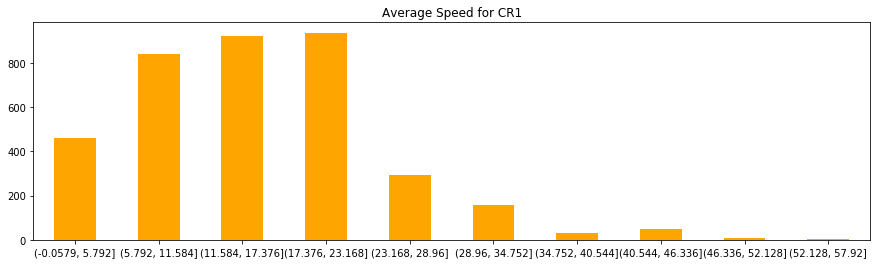

In [30]:
out = pd.cut(CR1['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="orange", figsize=(15,4))
ax.set_title('Average Speed for CR1')
plt.show()

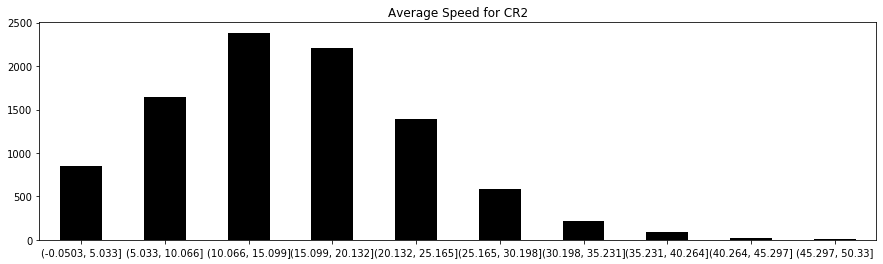

In [31]:
out = pd.cut(CR2['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="black", figsize=(15,4))
ax.set_title('Average Speed for CR2')
plt.show()

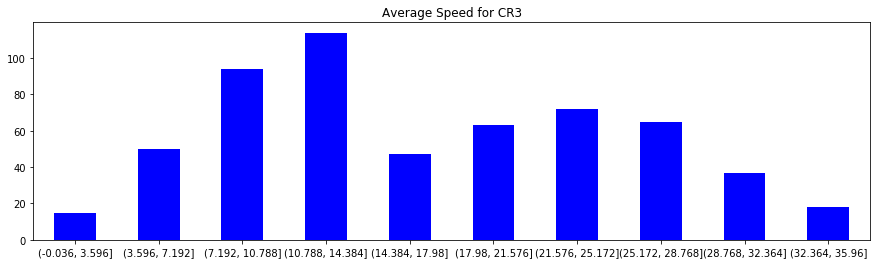

In [32]:
out = pd.cut(CR3['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,4))
ax.set_title('Average Speed for CR3')
plt.show()

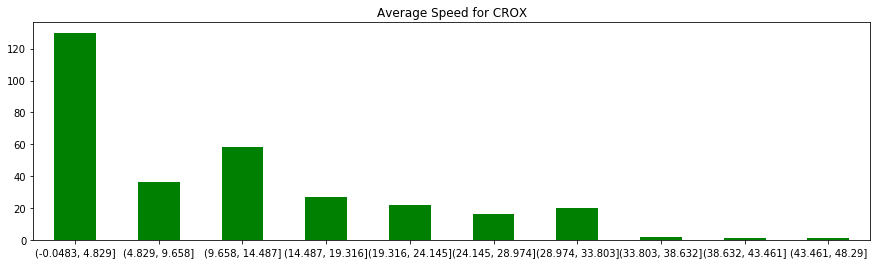

In [33]:
out = pd.cut(CROX['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="g", figsize=(15,4))
ax.set_title('Average Speed for CROX')
plt.show()

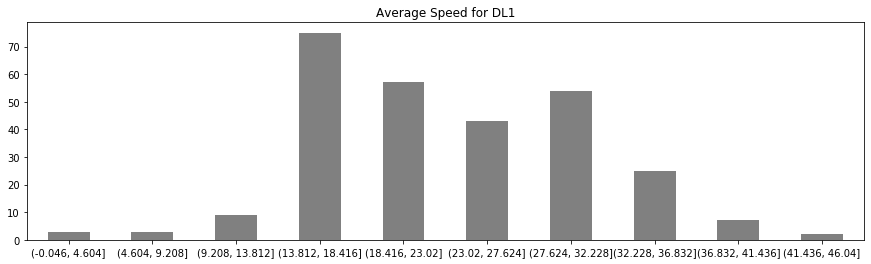

In [34]:
out = pd.cut(DL1['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="gray", figsize=(15,4))
ax.set_title('Average Speed for DL1')
plt.show()

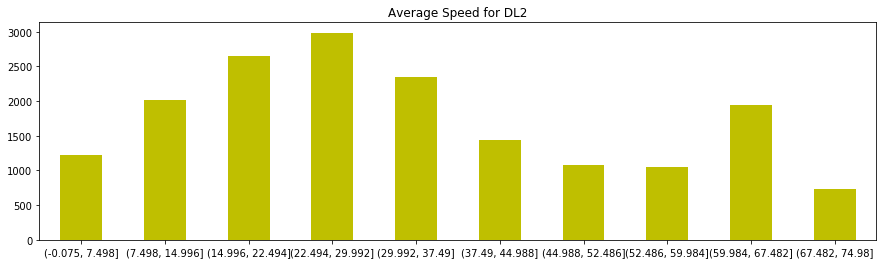

In [35]:
out = pd.cut(DL2['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="y", figsize=(15,4))
ax.set_title('Average Speed for DL2')
plt.show()

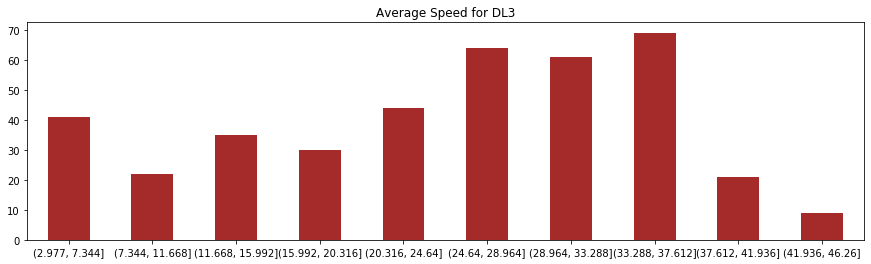

In [36]:
out = pd.cut(DL3['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="brown", figsize=(15,4))
ax.set_title('Average Speed for DL3')
plt.show()

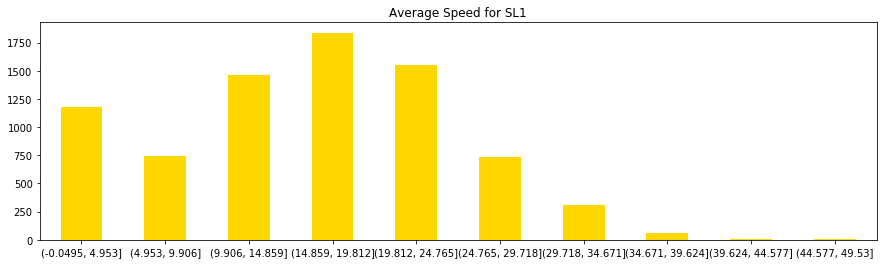

In [37]:
out = pd.cut(SL1['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="gold", figsize=(15,4))
ax.set_title('Average Speed for SL1')
plt.show()

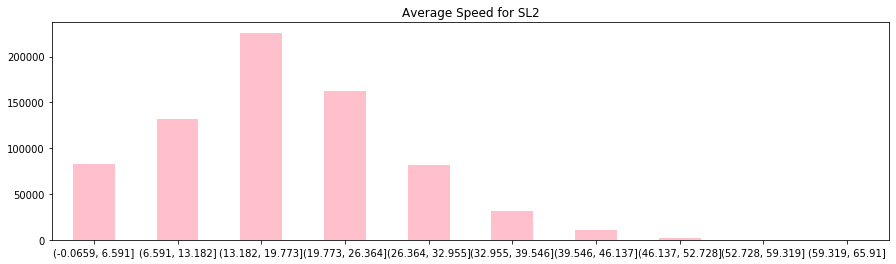

In [38]:
out = pd.cut(SL2['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="pink", figsize=(15,4))
ax.set_title('Average Speed for SL2')
plt.show()

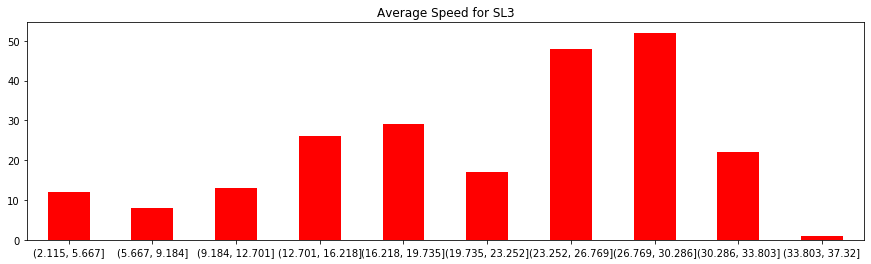

In [39]:
out = pd.cut(SL3['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="red", figsize=(15,4))
ax.set_title('Average Speed for SL3')
plt.show()

### Road type per urban/rural

In [43]:
CR1_Urban = CR1.loc[CR1['urban_rural']=='Urban']
CR1_Rural = CR1.loc[CR1['urban_rural']=='Rural']

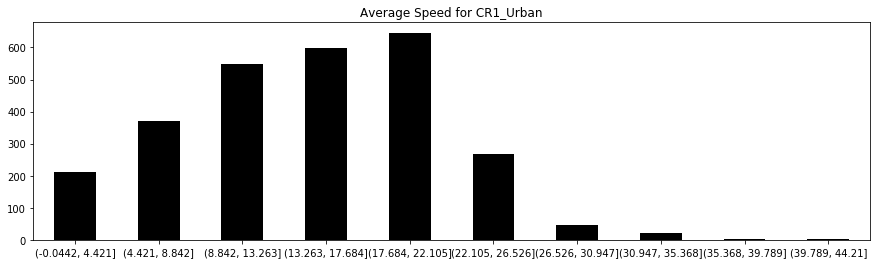

In [47]:
out = pd.cut(CR1_Urban['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="black", figsize=(15,4))
ax.set_title('Average Speed for CR1_Urban')
plt.show()

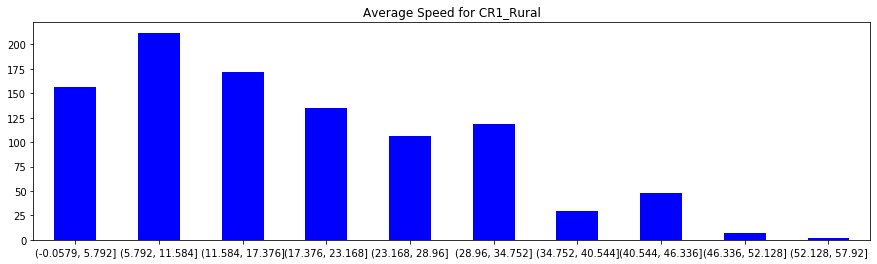

In [48]:
out = pd.cut(CR1_Rural['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(15,4))
ax.set_title('Average Speed for CR1_Rural')
plt.show()

In [51]:
SL2_Urban = SL2.loc[SL2['urban_rural']=='Urban']
SL2_Rural = SL2.loc[SL2['urban_rural']=='Rural']

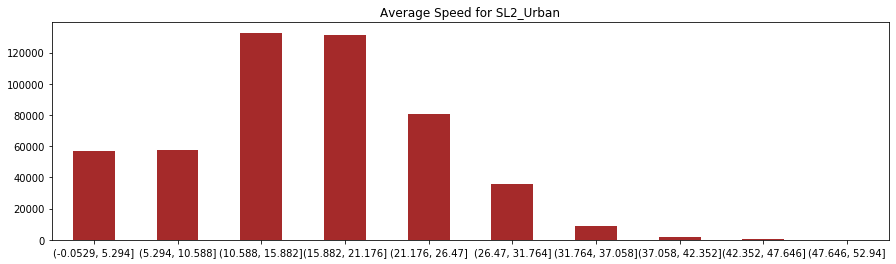

In [52]:
out = pd.cut(SL2_Urban['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="brown", figsize=(15,4))
ax.set_title('Average Speed for SL2_Urban')
plt.show()

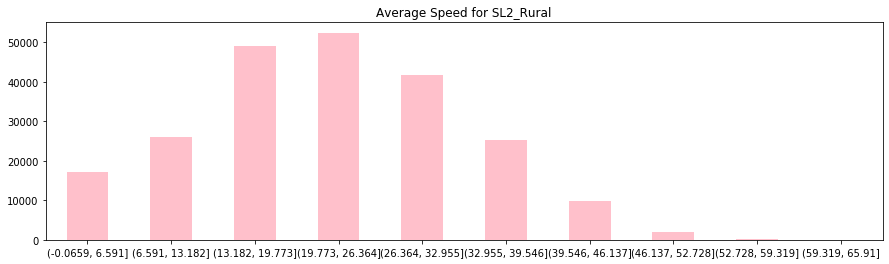

In [53]:
out = pd.cut(SL2_Rural['Avgspeed(mph)'], bins=10)
out.value_counts().reindex(out.cat.categories)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="pink", figsize=(15,4))
ax.set_title('Average Speed for SL2_Rural')
plt.show()